Data description “e-shop clothing 2008”

Variables:

    YEAR (2008)

========================================================

    MONTH -> from April (4) to August (8)

========================================================

    DAY -> day number of the month

========================================================

    ORDER -> sequence of clicks during one session

========================================================

    COUNTRY -> variable indicating the country of origin of the IP address with the
    following categories:

1-Australia
2-Austria
3-Belgium
4-British Virgin Islands
5-Cayman Islands
6-Christmas Island
7-Croatia
8-Cyprus
9-Czech Republic
10-Denmark
11-Estonia
12-unidentified
13-Faroe Islands
14-Finland
15-France
16-Germany
17-Greece
18-Hungary
18-Iceland
20-India
21-Ireland
22-Italy
23-Latvia
24-Lithuania
25-Luxembourg
26-Mexico
27-Netherlands
28-Norway
28-Poland
30-Portugal
31-Romania
32-Russia
33-San Marino
34-Slovakia
35-Slovenia
36-Spain
37-Sweden
38-Switzerland
39-Ukraine
40-United Arab Emirates
41-United Kingdom
42-USA
43-biz (.biz) 44-com (.com)
45-int (.int) 46-net (.net)
47-org (*.org)

========================================================

    SESSION ID -> variable indicating session id (short record)

========================================================

    PAGE 1 (MAIN CATEGORY) -> concerns the main product category:
    1-trousers
    2-skirts
    3-blouses
    4-sale

========================================================

    PAGE 2 (CLOTHING MODEL) -> contains information about the code for each product
    (217 products)

========================================================

    COLOUR -> colour of product

1-beige
2-black
3-blue
4-brown
5-burgundy
6-gray
7-green
8-navy blue
9-of many colors
10-olive
11-pink
12-red
13-violet
14-white

========================================================

    LOCATION -> photo location on the page, the screen has been divided into six parts:

1-top left
2-top in the middle
3-top right
4-bottom left
5-bottom in the middle
6-bottom right

========================================================

    MODEL PHOTOGRAPHY -> variable with two categories:

1-en face
2-profile

========================================================

    PRICE -> price in US dollars

========================================================

    PRICE 2 -> variable informing whether the price of a particular product is higher than
    the average price for the entire product category

1-yes
2-no

========================================================

    PAGE -> page number within the e-store website (from 1 to 5)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++

I want to know how to solve this data regarding any problem (clustering, regression, classification, EDA)

In [1]:
# importing libiraries
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
sns.set() # this command sets the seaborn chart style as the default
# suppressing warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# machine learning libraries
from sklearn.model_selection import cross_val_score
# train test split
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


In [2]:
# read e-shop clothing 2008.csv
df = pd.read_csv('e-shop clothing 2008.csv', delimiter=',')
df.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

In [4]:
# find duplicate rows
df.duplicated().sum()

0

In [5]:
df.describe()

,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page
count,165474.0,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,2008.0,5.585887,14.524554,9.817476,26.952621,12058.417056,2.400842,6.227655,3.258198,1.260071,43.802507,1.488167,1.710166
std,0.0,1.328160,8.830374,13.478411,7.150691,7008.418903,1.144420,4.235606,1.713206,0.438674,12.548131,0.499861,0.982412
min,2008.0,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,29.000000,5931.000000,1.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,2008.0,5.000000,14.000000,6.000000,29.000000,11967.500000,2.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,7.000000,22.000000,12.000000,29.000000,18219.000000,3.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,2008.0,8.000000,31.000000,195.000000,47.000000,24026.000000,4.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


In [6]:
# Set the matplotlib color cycle using a seaborn palette
sns.set_palette('colorblind')

Price 2 visualization to know how many above average

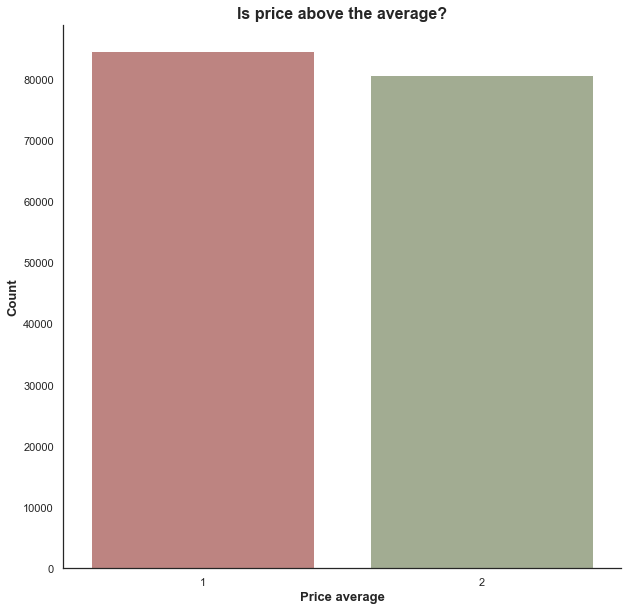

In [7]:
#labels=["Yes","No"]
#sns.set_style("dark")
sns.set_style("white")
cols= ["#C77B77","#A3B08E"]
plt.figure(figsize=(10,10))
sns.countplot(x= df['price 2'],
             palette=cols,)
plt.title("Is price above the average?", fontsize = 16, weight = "bold")
plt.xlabel("Price average", fontsize = 13, weight = "bold")
plt.ylabel("Count", fontsize = 13, weight = "bold")
#plt.legend(labels = labels, loc = "best") # Add a legend and specify its location on the chart.
sns.despine() # removes the top and right border of our graph
plt.savefig("Is price above the average.png") #export chart as a picture
plt.show()

In [8]:
df_viz = df.rename(columns={ 'page 1 (main category)':'Type'})
df_viz.Type = df_viz.Type.replace({1: 'Trousers', 2: 'Skirts', 3: 'Blouses', 4: 'Sale'})
df_viz.month = df_viz.month.replace({4: 'April', 5: 'May', 6: 'June', 7:'July', 8: 'August'})
df_viz.head(20)

,year,month,day,order,country,session ID,Type,page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,April,1,1,29,1,Trousers,A13,1,5,1,28,2,1
1,2008,April,1,2,29,1,Trousers,A16,1,6,1,33,2,1
2,2008,April,1,3,29,1,Skirts,B4,10,2,1,52,1,1
3,2008,April,1,4,29,1,Skirts,B17,6,6,2,38,2,1
4,2008,April,1,5,29,1,Skirts,B8,4,3,2,52,1,1
5,2008,April,1,6,29,1,Blouses,C56,6,1,2,57,1,4
6,2008,April,1,7,29,1,Blouses,C57,5,1,2,33,2,4
7,2008,April,1,8,29,1,Sale,P67,9,5,1,38,1,4
8,2008,April,1,9,29,1,Sale,P82,6,4,2,48,1,5
9,2008,April,1,1,29,2,Skirts,B31,9,5,1,57,1,2


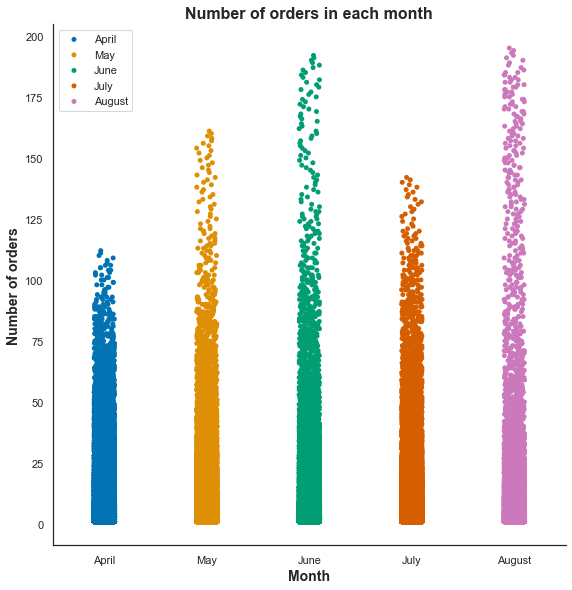

In [9]:
labels=['April','May','June','July','August']
sns.catplot(data=df_viz, x="month", y="order",height=8)
plt.title("Number of orders in each month", fontsize = 16, weight = "bold")
plt.xlabel("Month", fontsize = 14, weight = "bold")
plt.ylabel("Number of orders", fontsize = 14, weight = "bold")
plt.legend(labels = labels, loc = "best")
plt.savefig("Number of orders in each month.png") #export chart as a picture

August is the month with the highest number of orders then June

Let's check why August and June has the highest number of orders and on the other hand, April has the least number of orders

In [10]:
df_sliced_April = df_viz.loc[(df_viz["month"] == "April"),  

               ["colour","location","model photography","price 2","Type"]]
df_sliced_April

,colour,location,model photography,price 2,Type
0,1,5,1,2,Trousers
1,1,6,1,2,Trousers
2,10,2,1,1,Skirts
3,6,6,2,2,Skirts
4,4,3,2,1,Skirts
...,...,...,...,...,...
48194,6,5,2,2,Skirts
48195,2,6,1,2,Skirts
48196,4,2,1,1,Sale
48197,12,1,2,2,Sale


In [24]:
df_sliced_April.columns[0]

'colour'

graph for colour: total = 14


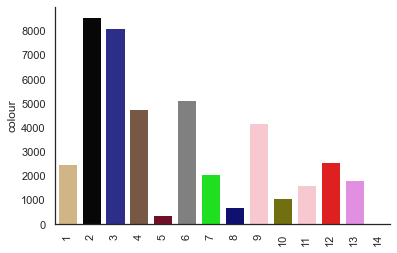

graph for location: total = 6


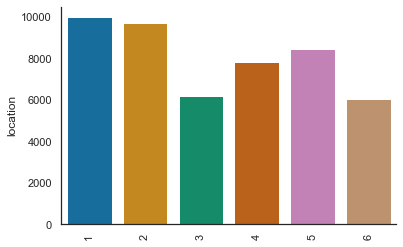

graph for model photography: total = 2


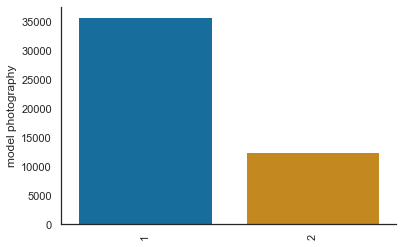

graph for price 2: total = 2


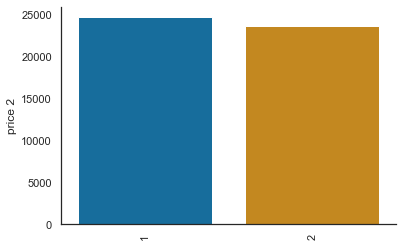

graph for Type: total = 4


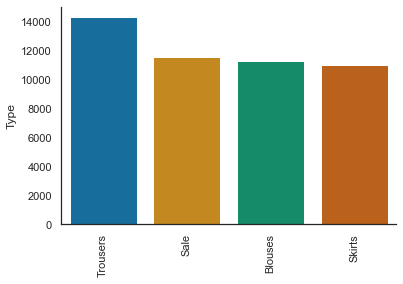

In [30]:
for i in df_sliced_April.columns:
    if i=='colour':
        cols=["#DCB87A","#080707","#1D1F98","#7F563B","#800020","#808080","#00FF00","#000080","#FFC0CB","#808000","#FFC0CB","#FF0000","#EE82EE","#FFFFFF"]  
        cat_num = df_sliced_April[i].value_counts()
        print("graph for %s: total = %d" % (i, len(cat_num)))
        chart = sns.barplot(x=cat_num.index, y=cat_num, palette=cols)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
        sns.despine() # removes the top and right border of our graph
        plt.show()
    else:
        cat_num = df_sliced_April[i].value_counts()
        print("graph for %s: total = %d" % (i, len(cat_num)))
        chart = sns.barplot(x=cat_num.index, y=cat_num,)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
        sns.despine() # removes the top and right border of our graph
        plt.show()
        

highest color:2
highest location:1
highest model-photography:1
highest price 2:1
highest Type: Trousers

In [31]:
df_sliced_August = df_viz.loc[(df_viz["month"] == "August"),  

               ["colour","location","model photography","price 2","Type"]]
df_sliced_August

,colour,location,model photography,price 2,Type
151326,3,4,1,1,Trousers
151327,3,4,1,2,Trousers
151328,3,1,1,2,Trousers
151329,11,2,1,1,Blouses
151330,13,1,1,2,Skirts
...,...,...,...,...,...
165469,2,4,1,1,Skirts
165470,3,4,1,1,Trousers
165471,3,1,1,2,Trousers
165472,12,1,1,1,Blouses


graph for colour: total = 14


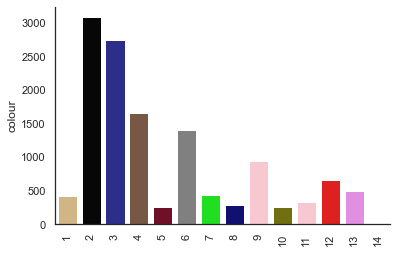

graph for location: total = 6


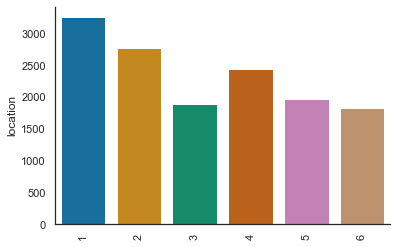

graph for model photography: total = 2


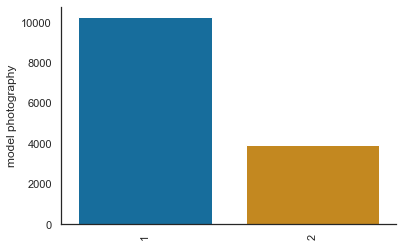

graph for price 2: total = 2


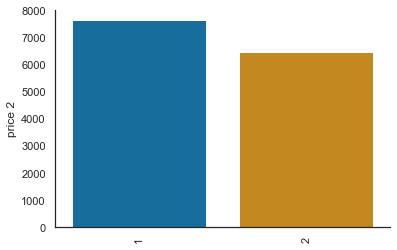

graph for Type: total = 4


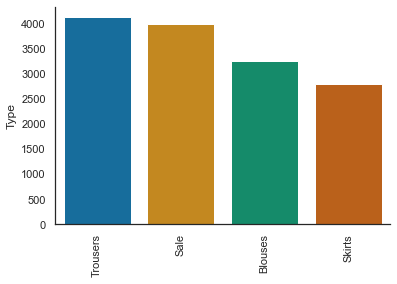

In [33]:
for i in df_sliced_August.columns:
    if i=='colour':
        cols=["#DCB87A","#080707","#1D1F98","#7F563B","#800020","#808080","#00FF00","#000080","#FFC0CB","#808000","#FFC0CB","#FF0000","#EE82EE","#FFFFFF"]  
        cat_num = df_sliced_August[i].value_counts()
        print("graph for %s: total = %d" % (i, len(cat_num)))
        chart = sns.barplot(x=cat_num.index, y=cat_num, palette=cols)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
        sns.despine() # removes the top and right border of our graph
        plt.show()
    else:
        cat_num = df_sliced_August[i].value_counts()
        print("graph for %s: total = %d" % (i, len(cat_num)))
        chart = sns.barplot(x=cat_num.index, y=cat_num,)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
        sns.despine() # removes the top and right border of our graph
        plt.show()

Does Type affect price?

In [34]:
df_viz["Type"]

0         Trousers
1         Trousers
2           Skirts
3           Skirts
4           Skirts
            ...   
165469      Skirts
165470    Trousers
165471    Trousers
165472     Blouses
165473      Skirts
Name: Type, Length: 165474, dtype: object

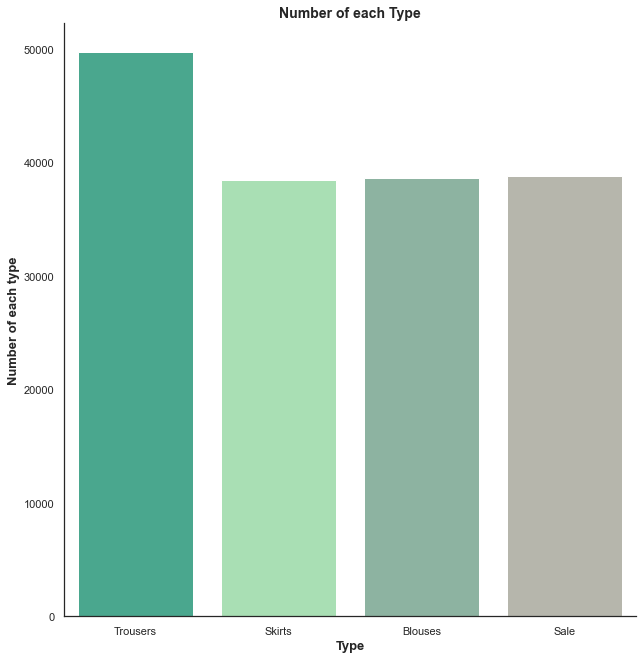

In [35]:
#labels=['Trousers','Skirts','Blouses','Sale']
sns.set_style("white")
cols=["#3AB795","#A0E8AF","#86BAA1","#B8B8AA"]
sns.catplot(data=df_viz, x="Type", kind="count", palette=cols, height=9)
plt.title("Number of each Type", fontsize = 14, weight = "bold")
plt.xlabel("Type", fontsize = 13, weight = "bold")
plt.ylabel("Number of each type", fontsize = 13, weight = "bold")
#plt.legend(labels = labels, loc = "best")
plt.savefig("Number of each Type.png") #export chart as a picture

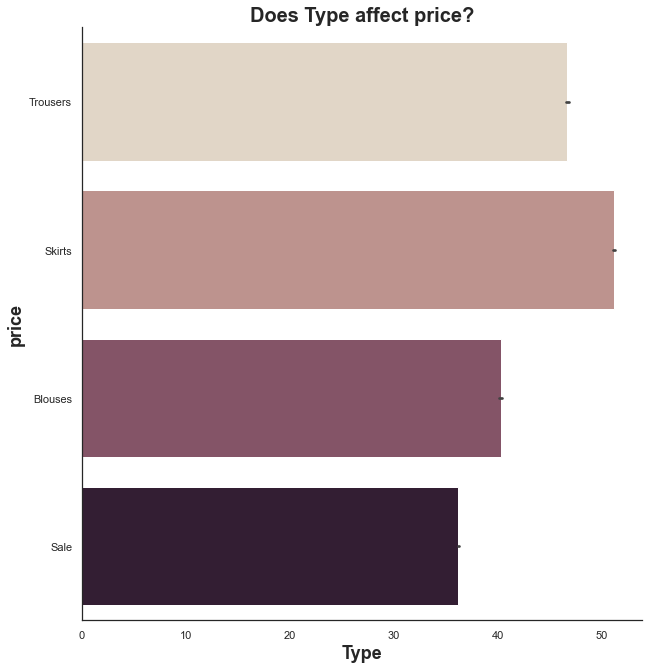

In [36]:
sns.catplot(data=df_viz, x="price", y="Type", kind="bar",palette="ch:.25", height=9)
plt.title("Does Type affect price?", fontsize = 20, weight = "bold")
plt.xlabel("Type", fontsize = 18, weight = "bold")
plt.ylabel("price", fontsize = 18, weight = "bold")
#plt.legend(labels = labels, loc = "best")
plt.savefig("Does Type affect price.png") #export chart as a picture

Sales per day in each month

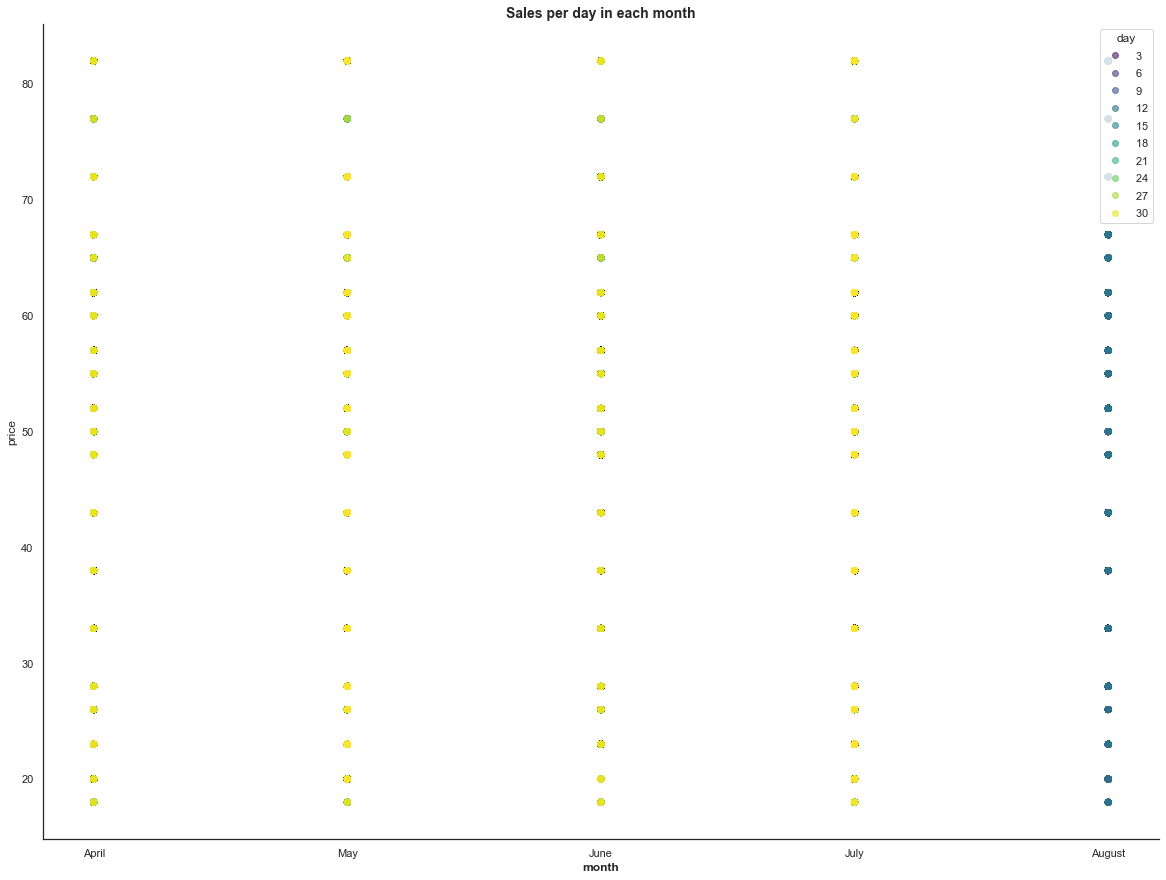

In [37]:
plt.figure(figsize = (20, 15)) # size of the figure
scatter = plt.scatter(df_viz['month'],
            df_viz['price'], 
            alpha = 0.6, #transparency level of points on the plot. Used to avoid overplotting
            c = df_viz['day'], # additional third feature
            cmap = 'viridis') #color map for the third variable
# add and format additional elements, such as legends, titles and axis labels
plt.legend(*scatter.legend_elements(),
           loc = "best",
           title = "day")
plt.title("Sales per day in each month", 
          fontsize = 14, 
          weight = "bold")
plt.xlabel("month", weight = "bold")
plt.ylabel("price")
sns.despine() # removes the top and right border of our graph
plt.show()

In [38]:
df['page 2 (clothing model)'].value_counts()

B4     3579
A2     3013
A11    2789
P1     2681
B10    2566
       ... 
P66      46
P22       2
P79       2
P54       1
P28       1
Name: page 2 (clothing model), Length: 217, dtype: int64

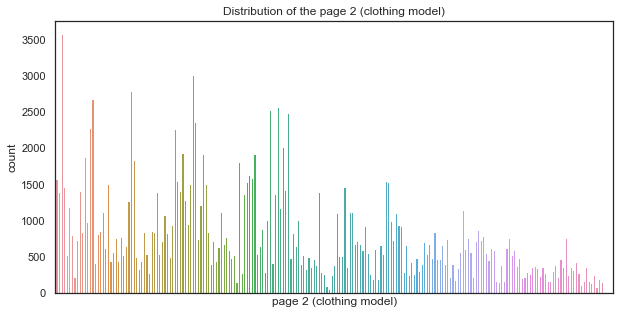

In [39]:
# plot the distribution of the page 2 (clothing model) hide the name of the x-axis
plt.figure(figsize=(10,5))
sns.countplot(x='page 2 (clothing model)', data=df)
plt.title('Distribution of the page 2 (clothing model)')
# hide the x-axis value
plt.xticks([])


plt.show()

preprocessing

In [40]:
df['page 2 (clothing model)'] = df['page 2 (clothing model)'].factorize()[0]

In [ ]:
df['page 2 (clothing model)'].value_counts()

In [ ]:
df['price 2'].value_counts()

finding outliers

In [ ]:
# plot boxplot of the columns in 2*3 grid
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.boxplot(ax=axes[0, 0], x='price', data=df)
sns.boxplot(ax=axes[0, 1], x='page', data=df)
sns.boxplot(ax=axes[0, 2], x='day', data=df)
sns.boxplot(ax=axes[1, 0], x='month', data=df)
sns.boxplot(ax=axes[1, 1], x='colour', data=df)
sns.boxplot(ax=axes[1, 2], x='page 2 (clothing model)', data=df)
plt.show()

In [ ]:
# find outliers
plt.figure(figsize=(10,5))
sns.boxplot(x='price', data=df)
plt.title('Distribution of the price 1')
plt.show()


In [ ]:
# solve the outliers by using the IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= Q1 - 1.5*IQR) & (df['price'] <= Q3 + 1.5*IQR)]


In [ ]:
# plot the distribution of the price 
plt.figure(figsize=(10,5))
sns.boxplot(x='price', data=df)
plt.title('Distribution of the price')
plt.show()


In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='page', data=df)
plt.title('Distribution of the page')
plt.show()


In [ ]:
# solve the outliers by using the IQR method
Q1 = df['page'].quantile(0.25)
Q3 = df['page'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['page'] >= Q1 - 1.5*IQR) & (df['page'] <= Q3 + 1.5*IQR)]


In [ ]:
# plot the distribution of the page
plt.figure(figsize=(10,5))
sns.boxplot(x='page', data=df)
plt.title('Distribution of the page')
plt.show()


In [ ]:
df['session ID'].value_counts()

In [ ]:
# drop session ID and page 2 (clothing model) column as it's irrelevant for the modeling
df.drop(columns=['session ID','page 2 (clothing model)','order'], axis=1, inplace=True)
df.info()

Modeling

Sampling the training data for hyper parameter tuning and feature selection

In [ ]:
# get a sample of 20000 rows from the train_df to train the model and 5000 rows to test the model from the test_df
train_df_sample = df.sample(n=20000, random_state=42)

In [ ]:
# train test split
X = train_df_sample.drop(['price'], axis=1)
y = train_df_sample['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

Regression on the price 1 column

In [ ]:
# checking other models to get a better score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# test the models
models = [('linear', LinearRegression()),
            ('random_forest', RandomForestRegressor()), 
            ('gradient_boosting', GradientBoostingRegressor()), 
            ('adaboost', AdaBoostRegressor()), 
            ('bagging', BaggingRegressor()), 
            ('extra_trees', ExtraTreesRegressor()),
            ('Linear Regression', LinearRegression()),
            ('Ridge Regression', Ridge()),
            ('Lasso Regression', Lasso()),
            ('ElasticNet Regression', ElasticNet())]
models

In [ ]:
# define a function to fit and evaluate the model
# import classification report and confusion matrix
from operator import mod
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from pyexpat import features
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
# feature selection using SelectKBest
# calculate the time taken to run the model
import time


# i is number of features
def features_selection_reg(start, end, step, X_train, y_train, X_test, y_test):
    features_comparison = pd.DataFrame({'number_of_features':[],'features':[], 'RF_pred_train':[], 'RF_pred_test':[], 'time':[]})
    for i in range(start, end, step):
        start_time = time.time()
        X_new = SelectKBest(chi2, k=i).fit_transform(X_train, y_train)
        X_new.shape
        # get the names of the selected features 
        features = list(X_train.columns[SelectKBest(chi2, k=i).fit(X_train, y_train).get_support()])
        print(features)

        # drop the features that are not selected
        X_new_train = X_train[features]
        X_new_test = X_test[features]
        
        print(X_new_train)
        print(X_new_test)
        # # Feature Scaling

        sc = StandardScaler()
        X_new_train = sc.fit_transform(X_new_train)
        X_new_test = sc.transform(X_new_test)

        # Encoding the Dependent Variable
        
        labelencoder_y_train = LabelEncoder()
        y_new_train = labelencoder_y_train.fit_transform(y_train)
        labelencoder_y_test = LabelEncoder()
        y_new_test = labelencoder_y_test.fit_transform(y_test)

        RF = RandomForestRegressor()
        RF.fit(X_new_train, y_new_train)
        RF_pred_train = RF.score(X_new_train,y_new_train)
        RF_pred_test = RF.score(X_new_test,y_new_test)

        end_time = time.time()
        time_taken = end_time - start_time
        print('Time taken to run the model is: ', time_taken)
        features_comparison = features_comparison.append({'number_of_features':i,'features':features , 'RF_pred_train':RF_pred_train, 'RF_pred_test':RF_pred_test, 'time':time_taken}, ignore_index=True)
    return features_comparison

In [ ]:
features_comparison_reg = features_selection_reg(1, 10, 1, X_train, y_train, X_test, y_test)

In [ ]:
features_comparison_reg

In [ ]:
RF_pred_train = list(features_comparison_reg['RF_pred_train'])
RF_pred_test = list(features_comparison_reg['RF_pred_test'])

In [ ]:
# plot the accuracy of the model with respect to the number of features used both for training and testing data
plt.figure(figsize=(10, 5))
plt.plot(features_comparison_reg['number_of_features'],RF_pred_train, label='Training Data')
plt.plot(features_comparison_reg['number_of_features'], RF_pred_test, label='Test Data')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy of the model with respect to the number of features')
plt.legend()


Select the top 5 features only

In [ ]:
best_features = features_comparison_reg['features'][4]
best_features.append('price')
print(best_features)

In [ ]:
X_best = train_df_sample[best_features]
X_best


In [ ]:
X = X_best.drop(['price'],axis=1)
y = X_best['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
# checking other models to get a better score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# test the models
models = [('linear', LinearRegression()),
            ('random_forest', RandomForestRegressor()), 
            ('gradient_boosting', GradientBoostingRegressor()), 
            ('adaboost', AdaBoostRegressor()), 
            ('bagging', BaggingRegressor()), 
            ('extra_trees', ExtraTreesRegressor()),
            ('Linear Regression', LinearRegression()),
            ('Ridge Regression', Ridge()),
            ('Lasso Regression', Lasso()),
            ('ElasticNet Regression', ElasticNet())]
models

In [ ]:
# train the models
results = {}
for name, model in models:
    model.fit(X_train, y_train)
    # save the results into a dictionary
    results[name] = model.score(X_test, y_test)
results


best model is random_forest

In [ ]:
RF_reg = RandomForestRegressor()
RF_reg.fit(X_train,y_train)

predictions = RF_reg.predict(X_test)

In [ ]:
# compare the predictions before and after the categorical columns were converted to numerical columns
sns.distplot(predictions, label='predictions before',color='red')
sns.distplot(y_test, label='real median house values', color='black')
plt.legend()

### Classification on the Price 2 column which classify if a product is average: 0 or above average: 1

In [ ]:
# train test split
X = train_df_sample.drop(['price 2'], axis=1)
y = train_df_sample['price 2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
# feature selection using SelectKBest
# calculate the time taken to run the model
import time


# i is number of features
def features_selection(start, end, step, X_train, y_train, X_test, y_test):
    features_comparison = pd.DataFrame({'number_of_features':[], 'classification_report_train':[], 'confusion_matrix_train':[], 'classification_report_test':[], 'confusion_matrix_test':[], 'time':[]})
    for i in range(start, end, step):
        start_time = time.time()
        X_new = SelectKBest(chi2, k=i).fit_transform(X_train, y_train)
        X_new.shape
        # get the names of the selected features 
        features = list(X_train.columns[SelectKBest(chi2, k=i).fit(X_train, y_train).get_support()])
        print(features)

        # drop the features that are not selected
        X_new_train = X_train[features]
        X_new_test = X_test[features]
        
        print(X_new_train)
        print(X_new_test)
        # # Feature Scaling

        sc = StandardScaler()
        X_new_train = sc.fit_transform(X_new_train)
        X_new_test = sc.transform(X_new_test)

        # Encoding the Dependent Variable
        
        labelencoder_y_train = LabelEncoder()
        y_new_train = labelencoder_y_train.fit_transform(y_train)
        labelencoder_y_test = LabelEncoder()
        y_new_test = labelencoder_y_test.fit_transform(y_test)

        svm_rbf = SVC(kernel='rbf')
        svm_rbf.fit(X_new_train, y_new_train)
        svm_rbf_pred_train = svm_rbf.predict(X_new_train)
        svm_rbf_pred_test = svm_rbf.predict(X_new_test)
        model_train_cr = classification_report(y_new_train, svm_rbf_pred_train)
        model_train_cm = confusion_matrix(y_new_train, svm_rbf_pred_train)

        model_test_cr = classification_report(y_new_test, svm_rbf_pred_test)
        model_test_cm = confusion_matrix(y_new_test, svm_rbf_pred_test)
        end_time = time.time()
        time_taken = end_time - start_time
        print('Time taken to run the model is: ', time_taken)
        features_comparison = features_comparison.append({'number_of_features':i,'features':features ,'classification_report_train':model_train_cr, 'confusion_matrix_train':model_train_cm, 'classification_report_test':model_test_cr, 'confusion_matrix_test':model_test_cm, 'time':time_taken}, ignore_index=True)
    return features_comparison

In [ ]:
features_comparison = features_selection(1, 10, 1, X_train, y_train, X_test, y_test)

In [ ]:
features_comparison

In [ ]:
#print the classification report of the training data
def features_comparison_report(i):
    print('Classification Report of Training Data')
    print(features_comparison['classification_report_train'][i])
    print(features_comparison['confusion_matrix_train'][i])
    print('')
    #print the classification report of the test data
    print('Classification Report of Test Data')
    print(features_comparison['classification_report_test'][i])
    print(features_comparison['confusion_matrix_test'][i])
    print('')
    #print the number of features
    print('Number of Features')
    print(features_comparison['number_of_features'][i])
    print('')
    #print the names of the features
    print('Names of the Features')
    print(features_comparison['features'][i])
    print('')

features_comparison_report(1)

The only feature that determine the if the price

In [ ]:
print(features_comparison['classification_report_train'][0].split())
print(features_comparison['classification_report_test'][0].split())
print(features_comparison['classification_report_train'][0].split()[14])

In [ ]:
# get the list of accuracies of the training data
def plot_accuracy(features_comparison):
    train_accuracy = []
    test_accuracy = []
    for i in range(0, len(features_comparison)):
        train_accuracy.append(features_comparison['classification_report_train'][i].split()[15])
        # get the list of accuracies of the test data
        test_accuracy.append(features_comparison['classification_report_test'][i].split()[15])
        
    
    # convert the list of accuracies of the training data to float
    train_accuracy = [float(i) for i in train_accuracy]
    # convert the list of accuracies of the test data to float
    test_accuracy = [float(i) for i in test_accuracy]

    print(train_accuracy)
    print(test_accuracy)
    return train_accuracy, test_accuracy

train_accuracy, test_accuracy = plot_accuracy(features_comparison)

In [ ]:
# plot the accuracy of the model with respect to the number of features used both for training and testing data
plt.figure(figsize=(10, 5))
plt.plot(features_comparison['number_of_features'], train_accuracy, label='Training Data')
plt.plot(features_comparison['number_of_features'], test_accuracy, label='Test Data')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy of the model with respect to the number of features')
plt.legend()


### Exactly 3 features are best for the model with no overfitting and high accuracy of 100% 

In [ ]:
# use 5 features to train the model
best_features = features_comparison['features'][2]
print(best_features)
#X_new = SelectKBest(chi2, k=5).fit_transform(X_train, y_train)

In [ ]:
X_train_best = X_train[best_features]

In [ ]:
# define a function to fit and evaluate the model
# import classification report and confusion matrix
from operator import mod
from sklearn.metrics import classification_report, confusion_matrix
def fit_and_evaluate(model):
    # fit the model to the training data
    model.fit(X_train, y_train)
    # make predictions and evalute
    model_pred_train = model.predict(X_train)
    model_pred_test = model.predict(X_test)

    model_train_cr = classification_report(y_train, model_pred_train)
    model_train_cm = confusion_matrix(y_train, model_pred_train)

    model_test_cr = classification_report(y_test, model_pred_test)
    model_test_cm = confusion_matrix(y_test, model_pred_test)

    return model_train_cr, model_train_cm, model_test_cr, model_test_cm

In [ ]:
# Using Logistic Regression, KNN, Decision Tree, Random Forest
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#calculate the time taken to run the model
import time

# Logistic Regression
start_time = time.time()

log_reg = LogisticRegression()
log_reg_cr, log_reg_cm, log_reg_test_cr, log_reg_test_cm = fit_and_evaluate(log_reg)
end_time = time.time()
time_taken = end_time - start_time
print('Logistic Regression: done!')
print('1 out of 5 models completed')
print('Time taken to run the model is: ', time_taken)

# KNN
start_time = time.time()
knn = KNeighborsClassifier()
knn_cr, knn_cm, knn_test_cr, knn_test_cm = fit_and_evaluate(knn)
end_time = time.time()
time_taken = end_time - start_time
print('KNN: done!')
print('2 out of 5 models completed')
print('Time taken to run the model is: ', time_taken)

# Decision Tree
start_time = time.time()
dt = DecisionTreeClassifier()
dt_cr, dt_cm, dt_test_cr, dt_test_cm = fit_and_evaluate(dt)
end_time = time.time()
time_taken = end_time - start_time
print('Decision Tree: done!')
print('3 out of 5 models completed')
print('Time taken to run the model is: ', time_taken)

# Random Forest
start_time = time.time()
rf = RandomForestClassifier()
rf_cr, rf_cm, rf_test_cr, rf_test_cm = fit_and_evaluate(rf)
end_time = time.time()
time_taken = end_time - start_time
print('Random Forest: done!')
print('4 out of 5 models completed')
print('Time taken to run the model is: ', time_taken)

# different kernel SVM
start_time = time.time()
svm= SVC()
svm_cr, svm_cm, svm_test_cr, svm_test_cm = fit_and_evaluate(svm)
end_time = time.time()
time_taken = end_time - start_time
print('SVM Linear: done!')
print('5 out of 5 models completed')
print('Time taken to run the model is: ', time_taken)

print('All models completed!')


In [ ]:
# create a data frame to store the results of the models
# and reshape the classification report and confusion matrix
model_comparison = pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM'],
                                    'classification_report_train':[log_reg_cr, knn_cr, dt_cr, rf_cr, svm_cr, ],
                                    'confusion_matrix_train':[log_reg_cm, knn_cm, dt_cm, rf_cm, svm_cm],
                                    'classification_report_test':[log_reg_test_cr, knn_test_cr, dt_test_cr, rf_test_cr, svm_test_cr],
                                    'confusion_matrix_test':[log_reg_test_cm, knn_test_cm, dt_test_cm, rf_test_cm, svm_test_cm]})
model_comparison



In [ ]:
i = 0
print('Classification Report of Training Data')
for i in range(0, len(model_comparison)):
    print(model_comparison['model'][i])
    print(model_comparison['classification_report_train'][i])
    print(model_comparison['confusion_matrix_train'][i])
    print('')
    i += 1

In [ ]:
# Classification Report of test data
i = 0
print('Classification Report of Test Data')
for i in range(0, len(model_comparison)):
    print(model_comparison['model'][i])
    print(model_comparison['classification_report_test'][i])
    print(model_comparison['confusion_matrix_test'][i])
    print('')
    i += 1
    

best models are decision tree and random forest

# k-means clustering

In [ ]:
# Set the styles to Seaborn
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

In [ ]:
df.shape

In [ ]:
df.head(20)

In [ ]:
df.info()

In [ ]:
# Create a copy of the original dataset
data_mapped = df.copy()
data_mapped

In [ ]:
x = data_mapped.iloc[:,3:14]
x

standardize the features

In [ ]:
from sklearn import preprocessing
# Scale the inputs
# preprocessing.scale scales each variable (column in x) with respect to itself
# The new result is an array
x_scaled = preprocessing.scale(x)
x_scaled

Elbow Method to determine the number of clusters

In [ ]:
# Createa an empty list
wcss =[]

# Create all possible cluster solutions with a loop
# We have chosen to get solutions from 1 to 9 clusters; you can ammend that if you wish
for i in range(1,10):
    # Cluster solution with i clusters
    kmeans = KMeans(i)
    # Fit the STANDARDIZED data
    kmeans.fit(x_scaled)
    # Append the WCSS for the iteration
    wcss.append(kmeans.inertia_)
    
# Check the result
wcss

In [ ]:
# Plot the number of clusters vs WCSS
plt.plot(range(1,10),wcss)
# Name axes
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Explore clustering solutions and select the number of clusters

In [ ]:
kmeans_new = KMeans(3)
# Fit the data
kmeans_new.fit(x_scaled)
# Create a new data frame with the predicted clusters
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new

In [ ]:
# Plot
plt.scatter(clusters_new['country'],clusters_new['order'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('country')
plt.ylabel('order')